<a href="https://colab.research.google.com/github/anisagar123/IOTEDU/blob/main/Analysis_of_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
iot=pd.read_csv('/content/drive/MyDrive/iot_telemetry_data.csv')

In [ ]:
iot.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
iot.tail(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405183,1.595203e+09,b8:27:eb:bf:9d:51,0.005914,48.400000,False,0.008695,False,0.023400,22.200000


In [ ]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


we can see there is no null values in the dataset

In [ ]:
iot['timestamp']=pd.to_datetime(iot['ts'],unit='s')


In [ ]:
iot.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp,timestamp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2020-07-12 00:01:41.761234999


we created a timestamp do do for analysis in efficient manner pandas will allocate the random timestamp

In [ ]:
iot.drop(columns=['ts'],inplace=True)
iot.head(5)

,device,co,humidity,light,lpg,motion,smoke,temp,timestamp
0,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2020-07-12 00:01:41.761234999


Since we added timestamp there will be no use of ts column so , I have droped it

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
Device=labelencoder.fit_transform(iot['device'])
Light=labelencoder.fit_transform(iot['light'])
Motion=labelencoder.fit_transform(iot['motion'])
onehotencoder=OneHotEncoder

By the help of above code i changed the categorical values to numerical so that i can draw more insigts by it

In [ ]:
iot['device']=Device
iot['light']=Light
iot['motion']=Motion
iot

,device,co,humidity,light,lpg,motion,smoke,temp,timestamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234999
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:33.162014961
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-07-20 00:03:33.576560736
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-07-20 00:03:36.167959213
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:36.979521513


In [ ]:
iot1=pd.DataFrame(iot)
iot1.head(5)

,device,co,humidity,light,lpg,motion,smoke,temp,timestamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234999


In [ ]:
iot1.isnull().sum()

device       0
co           0
humidity     0
light        0
lpg          0
motion       0
smoke        0
temp         0
timestamp    0
dtype: int64

In [ ]:
iot1['temp']=(iot1['temp']*1.8)+32
iot1.head(5)

,device,co,humidity,light,lpg,motion,smoke,temp,timestamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-07-12 00:01:41.761234999


Here i converted temperature in fahr to celsius

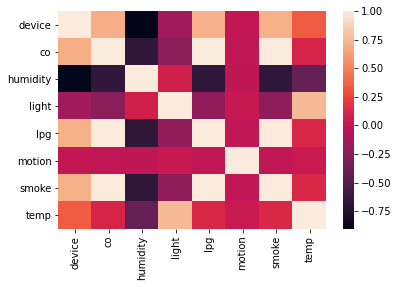

In [ ]:
sns.heatmap(iot1.corr())

In above plot we can see the correlation between each feature 
more darker the region more the relation

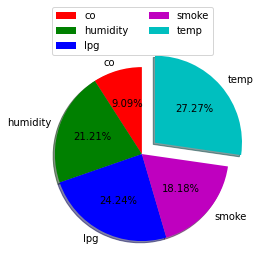

In [ ]:
affect=['co','humidity','lpg','smoke','temp']
color=['r','g','b','m','c']
slice=[3,7,8,6,9]

plt.pie(slice,labels=affect,colors=color,startangle=90,shadow=True,
        explode=(0,0,0,0,0.2),autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(0.85,1.20),ncol=2)
plt.show()

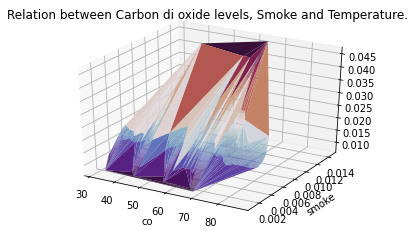

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(iot1['temp'], iot1['co'], iot1['smoke'], cmap = plt.cm.twilight_shifted)
plt.title('Relation between Carbon di oxide levels, Smoke and Temperature.')
plt.xlabel('co')
plt.ylabel('smoke')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


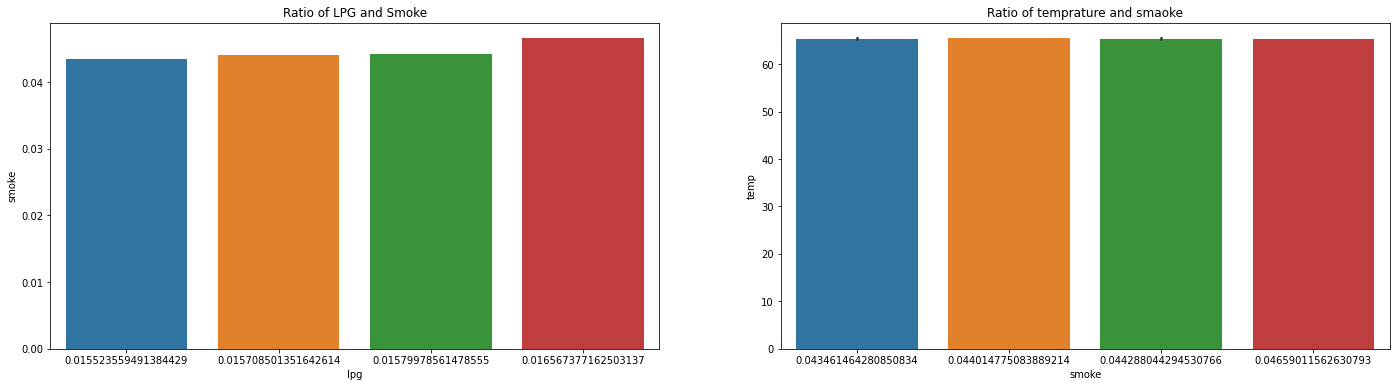

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot('lpg','smoke',ax=ax[0],data=iot1.sort_values(by='lpg',ascending=False).head(10)).set_title('Ratio of LPG and Smoke')
sns.barplot('smoke','temp',ax=ax[1],data=iot1.sort_values(by='smoke',ascending=False).head(10)).set_title('Ratio of temprature and smaoke')
plt.show()

In [ ]:
iot2=iot1.head(500)

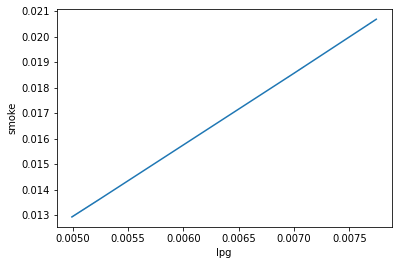

In [ ]:
sns.lineplot(x='lpg',y='smoke',data=iot2)
plt.show()

In [ ]:
iot3=iot.tail(500)

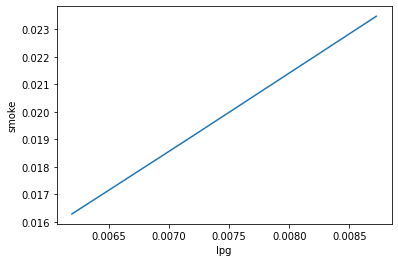

In [ ]:
sns.lineplot(x='lpg',y='smoke',data=iot3)
plt.show()

by plot we can conclude that there is a linear relation between lpg and smoke

In [ ]:
iot4=iot.head(5000)

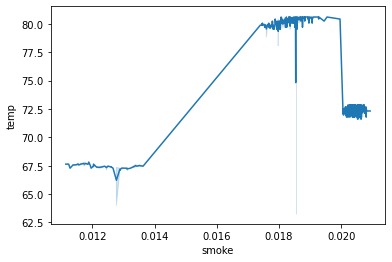

In [ ]:
sns.lineplot(x='smoke',y='temp',data=iot4)
plt.show()


In [ ]:
iot5=iot.tail(5000)

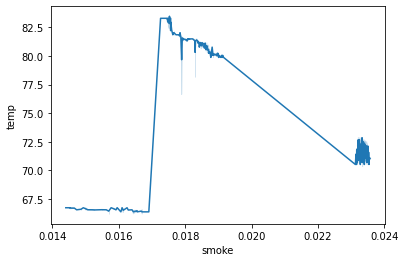

In [ ]:
sns.lineplot(x='smoke',y='temp',data=iot5)

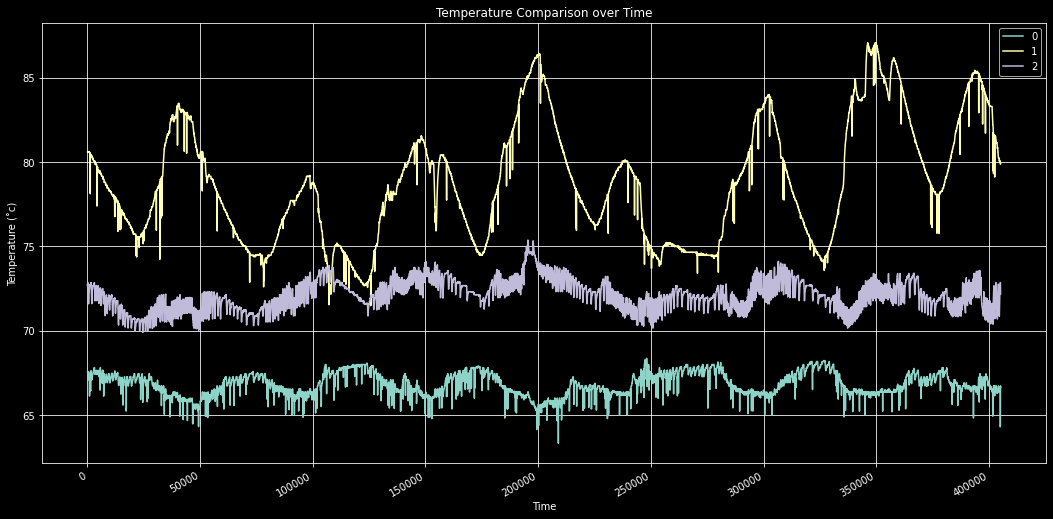

In [128]:
groups = iot1.groupby('device')

fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.temp.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Temperature Comparison over Time')
plt.ylabel('Temperature (˚c)')
plt.xlabel('Time')
plt.show()


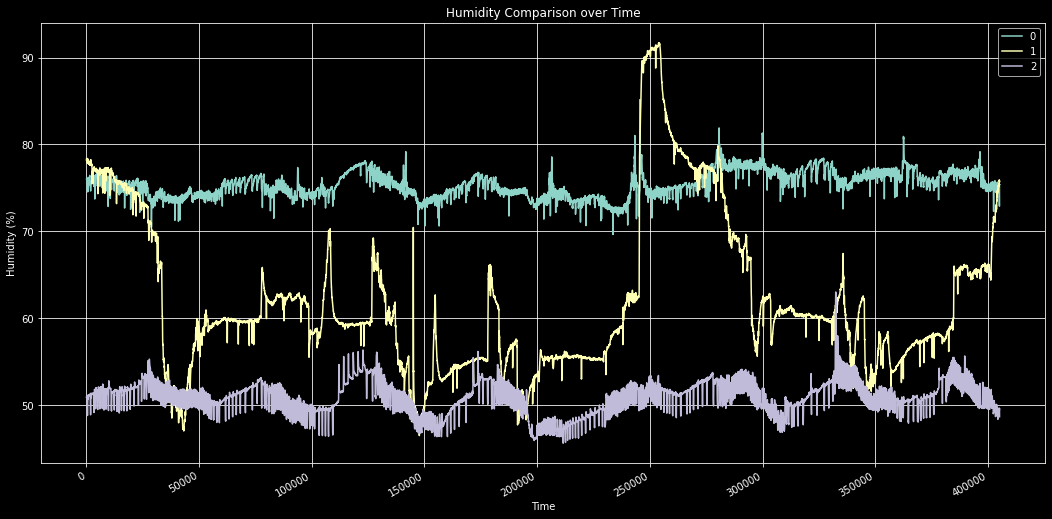

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.humidity.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Humidity Comparison over Time')
plt.ylabel('Humidity (%)')
plt.xlabel('Time')
plt.show()


In [81]:

df_1 = iot1[iot1.device == 0]
df_2 = iot1[iot1.device == 1]
df_3 = iot1[iot1.device == 2]



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


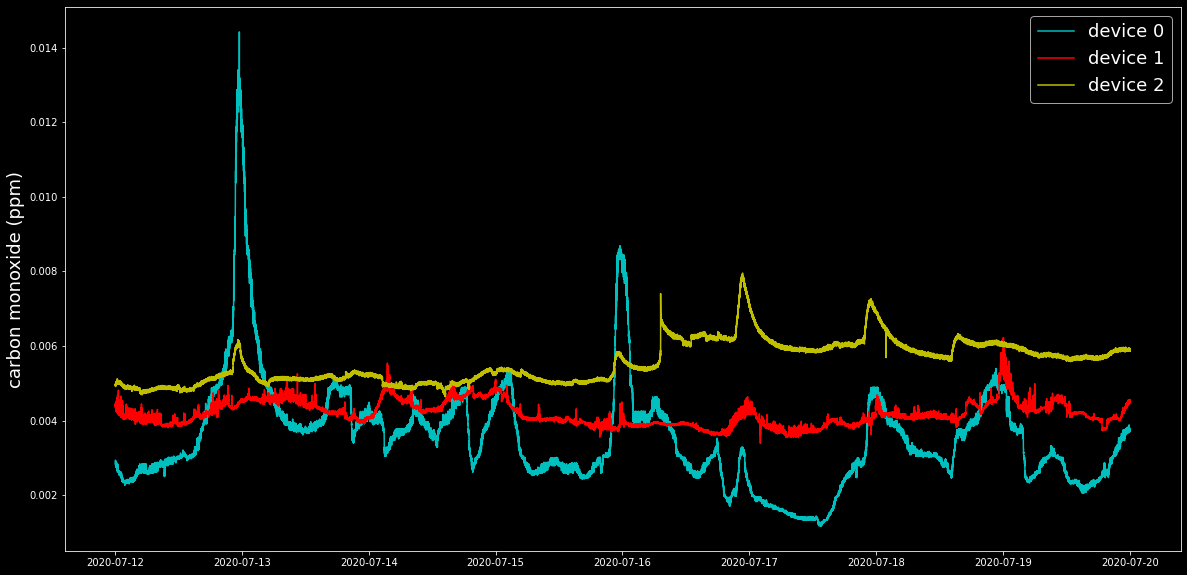

In [90]:


import matplotlib.dates as mdates

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.timestamp, df_1.co, color = 'c', label = 'device 0')
ax2 = sns.lineplot(df_2.timestamp, df_2.co, color = 'red', label = 'device 1')
ax3 = sns.lineplot(df_3.timestamp, df_3.co, color = 'y', label = 'device 2')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('carbon monoxide (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


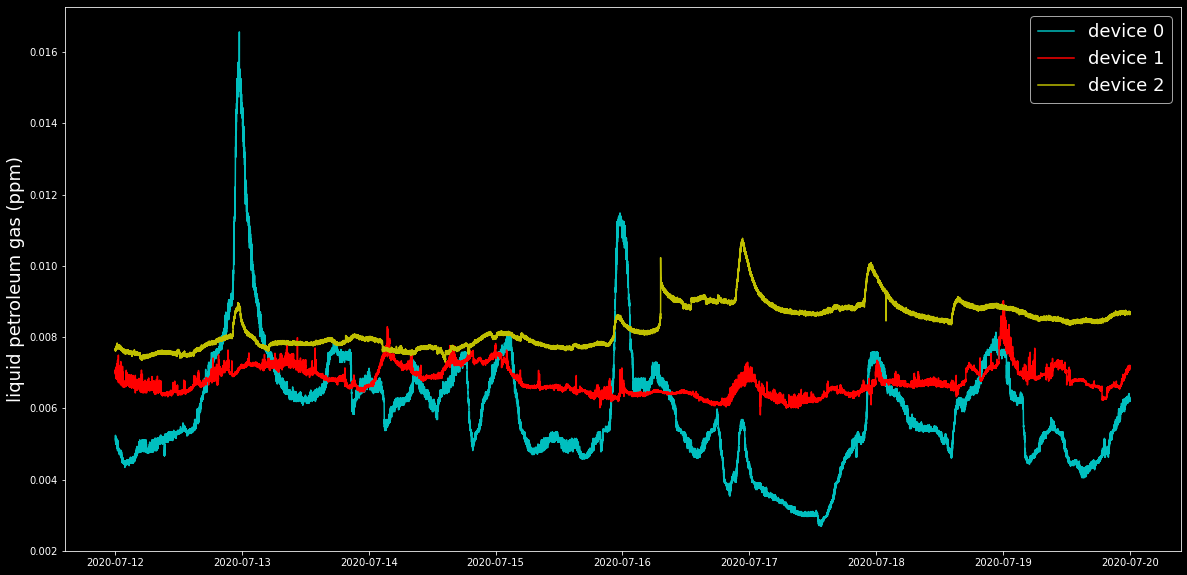

In [92]:

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.timestamp, df_1.lpg, color = 'c', label = 'device 0')
ax2 = sns.lineplot(df_2.timestamp, df_2.lpg, color = 'red', label = 'device 1')
ax3 = sns.lineplot(df_3.timestamp, df_3.lpg, color = 'y', label = 'device 2')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('liquid petroleum gas (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


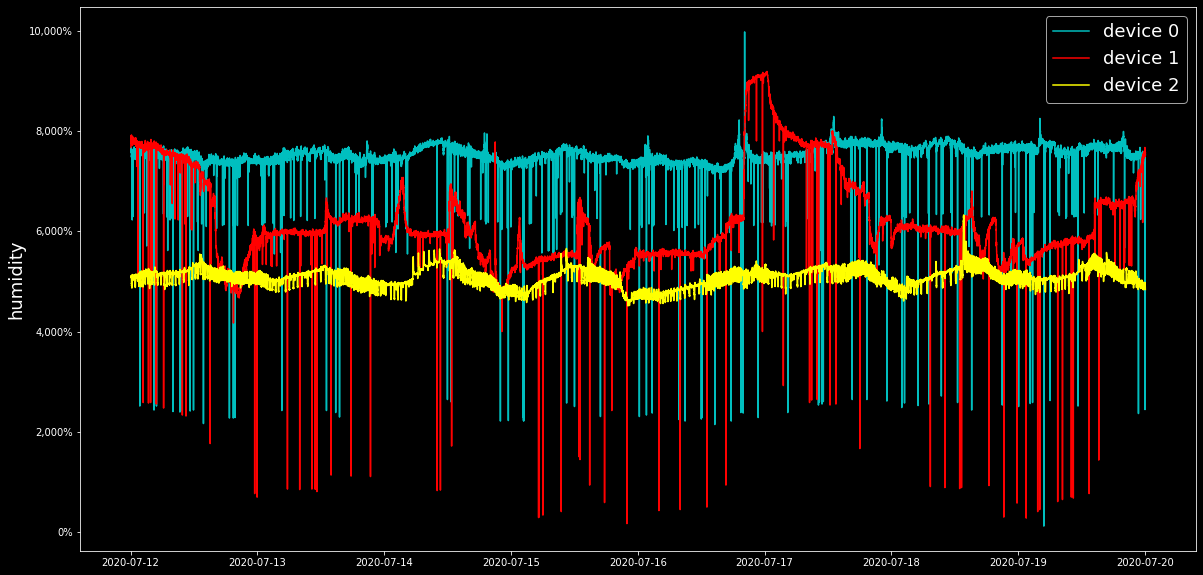

In [93]:

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.timestamp, df_1.humidity, color = 'c', label = 'device 0')
ax2 = sns.lineplot(df_2.timestamp, df_2.humidity, color = 'red', label = 'device 1')
ax3 = sns.lineplot(df_3.timestamp, df_3.humidity, color = 'yellow', label = 'device 2')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('humidity', fontsize = 18)
plt.legend(fontsize = 18)
plt.xlabel('')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


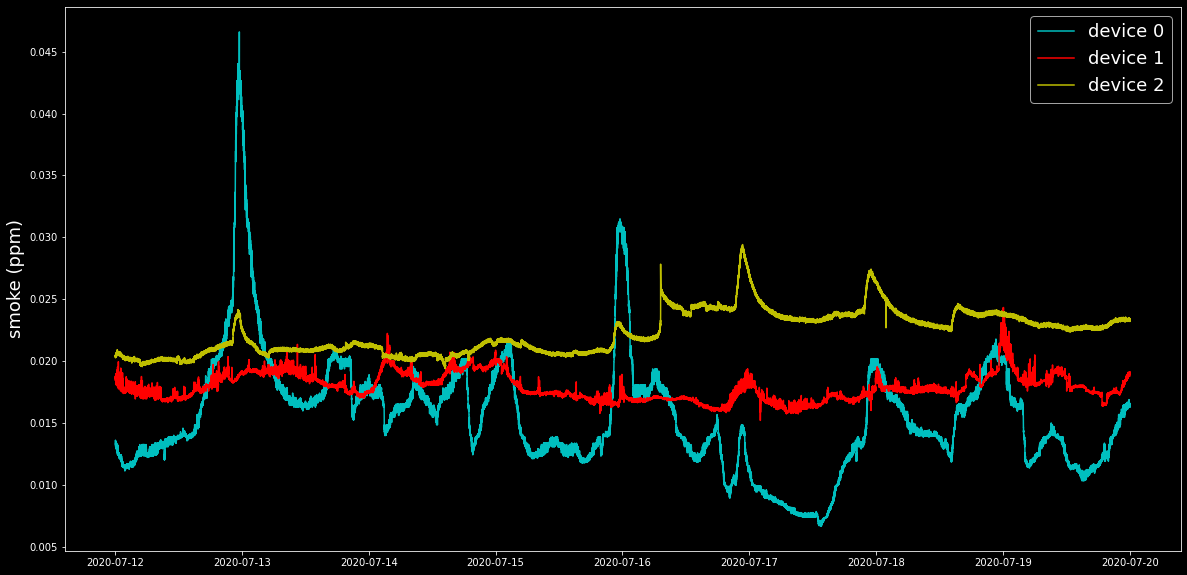

In [98]:

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.timestamp, df_1.smoke, color = 'c', label = 'device 0')
ax2 = sns.lineplot(df_2.timestamp, df_2.smoke, color = 'red', label = 'device 1')
ax3 = sns.lineplot(df_3.timestamp, df_3.smoke, color = 'y', label = 'device 2')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('smoke (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


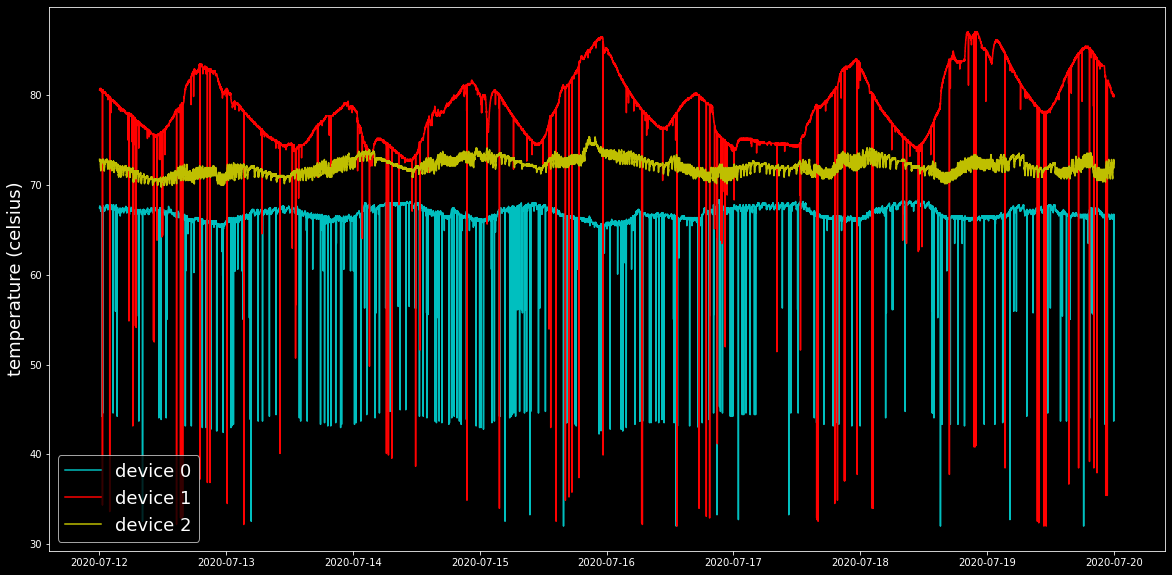

In [99]:

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.timestamp, df_1.temp, color = 'c', label = 'device 0')
ax2 = sns.lineplot(df_2.timestamp, df_2.temp, color = 'red', label = 'device 1')
ax3 = sns.lineplot(df_3.timestamp, df_3.temp, color = 'y', label = 'device 2')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('temperature (celsius)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()


In [ ]:
iot.drop('timestamp',axis=1,inplace=True)

In [116]:

iot.head(3)

,device,co,humidity,light,lpg,motion,smoke,temp
0,2,0.004956,51.0,0,0.007651,0,0.020411,72.860000
1,0,0.002840,76.0,0,0.005114,0,0.013275,67.460001
2,2,0.004976,50.9,0,0.007673,0,0.020475,72.680000


In [117]:
x = iot.drop('motion', axis= 1)
y = iot['motion'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
x

,device,co,humidity,light,lpg,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0.020411,72.860000
1,0,0.002840,76.000000,0,0.005114,0.013275,67.460001
2,2,0.004976,50.900000,0,0.007673,0.020475,72.680000
3,1,0.004403,76.800003,1,0.007023,0.018628,80.600000
4,2,0.004967,50.900000,0,0.007664,0.020448,72.680000
...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0.016437,66.560001
405180,2,0.005882,48.500000,0,0.008660,0.023301,71.960000
405181,1,0.004540,75.699997,1,0.007181,0.019076,79.880001
405182,0,0.003745,75.300003,0,0.006247,0.016437,66.560001


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)


In [121]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
prediction = reg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction)



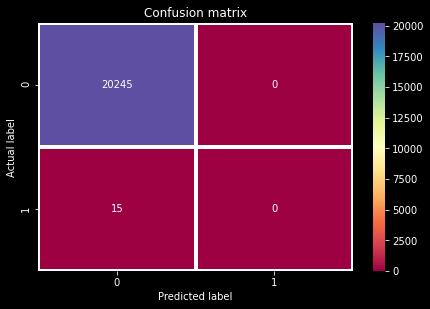

In [126]:
sns.heatmap(cnf_matrix, annot=True, cmap="Spectral" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))


Accuracy: 0.9992596248766041
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since motion had only 482 values =True which is 0% value of the entire Dataset in the Motion column others are False (405k = 100%) , so the machine will not predict the right accuracy.¶
Accuracy is approx 100% which means machine is overfitted.
Precision = 0, which means that the machine could not find relevant data with true values.